<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-признаков-без-взаимодействий,-первичная-фильтрация" data-toc-modified-id="Анализ-признаков-без-взаимодействий,-первичная-фильтрация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ признаков без взаимодействий, первичная фильтрация</a></span><ul class="toc-item"><li><span><a href="#Price" data-toc-modified-id="Price-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Price</a></span></li><li><span><a href="#Square_Total" data-toc-modified-id="Square_Total-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Square_Total</a></span></li><li><span><a href="#Square_Kitchen-(To-delete)" data-toc-modified-id="Square_Kitchen-(To-delete)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Square_Kitchen (To delete)</a></span></li><li><span><a href="#Square_Living-(To-delete)" data-toc-modified-id="Square_Living-(To-delete)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Square_Living (To delete)</a></span></li><li><span><a href="#Floors_In_Building" data-toc-modified-id="Floors_In_Building-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Floors_In_Building</a></span></li><li><span><a href="#Floor" data-toc-modified-id="Floor-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Floor</a></span></li><li><span><a href="#District" data-toc-modified-id="District-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>District</a></span></li><li><span><a href="#Year_Building" data-toc-modified-id="Year_Building-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Year_Building</a></span></li><li><span><a href="#Material-(Filtered)" data-toc-modified-id="Material-(Filtered)-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Material (Filtered)</a></span></li><li><span><a href="#Apartment_Type-(To-delete)" data-toc-modified-id="Apartment_Type-(To-delete)-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Apartment_Type (To delete)</a></span></li><li><span><a href="#Rooms_Number-(Filtered)" data-toc-modified-id="Rooms_Number-(Filtered)-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Rooms_Number (Filtered)</a></span></li><li><span><a href="#Apartment_Condition" data-toc-modified-id="Apartment_Condition-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Apartment_Condition</a></span></li><li><span><a href="#Bathroom_Type" data-toc-modified-id="Bathroom_Type-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Bathroom_Type</a></span></li><li><span><a href="#Balcony_Loggia" data-toc-modified-id="Balcony_Loggia-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>Balcony_Loggia</a></span></li><li><span><a href="#Address,-Date_Add,-Date_Expiration" data-toc-modified-id="Address,-Date_Add,-Date_Expiration-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>Address, Date_Add, Date_Expiration</a></span></li></ul></li><li><span><a href="#Анализ-признаков-с-взаимодействиями,-фильтрация-данных" data-toc-modified-id="Анализ-признаков-с-взаимодействиями,-фильтрация-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ признаков с взаимодействиями, фильтрация данных</a></span><ul class="toc-item"><li><span><a href="#1-комнатные-квартиры" data-toc-modified-id="1-комнатные-квартиры-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1-комнатные квартиры</a></span><ul class="toc-item"><li><span><a href="#Price-&amp;-Square_Total" data-toc-modified-id="Price-&amp;-Square_Total-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Price &amp; Square_Total</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from os import listdir
import geocoder

In [2]:
pd.set_option('display.max_rows', 2000)
sns.set(rc={'figure.figsize': (15, 10)})
# %matplotlib inline

In [ ]:
# address = ['Томск, Ванцетти переулок 6 2']

In [ ]:
# for i in address:
#     test = get_soup_by_url('https://yandex.ru/maps/67/tomsk/search/{0}%2C/?ll=84.988419%2C56.533635&sll=84.988423%2C56.461173&sspn=0.008219%2C0.007510&z=11'.format(i))
#     print(i, '-', test.find('div', {'class':'clipboard__action-wrapper _inline'}).text)
#     time.sleep(random.randint(1, 3))

In [120]:
def get_coordinate_by_address(Address_List):
        address_set = set(Address_List)
        path = 'C:/Users/qwerty.Oleg/Desktop/MyProject/Data/'
        filename1 = path + 'coord_dict.json'
        filename2 = path + 'coord_not_info_dict.json'

        if 'coord_dict.json' in listdir(path):
            with open(filename1, 'r') as file:
                coord_dict = json.load(file)
        else:
            coord_dict = {}

        if 'coord_not_info_dict.json' in listdir(path):
            with open(filename2, 'r') as file2:
                coord_not_info_dict = json.load(file2)
        else:
            coord_not_info_dict = {}

        len_storage = len(coord_dict)
        print('Coordinates in storage:', len_storage, '\n')

        address_to_load = address_set.difference(set(coord_dict))

        for i, address in enumerate(address_to_load):
            print(i / len(address_to_load))
            g = geocoder.osm(address)
            if g.osm is not None and len(g.osm) == 8:
                coord_dict[address] = g.latlng
            else:
                coord_dict[address] = [None, None]
                coord_not_info_dict[address] = [None, None]

        with open(filename1, 'w') as file1:
            json.dump(coord_dict, file1, ensure_ascii=False)
        with open(filename2, 'w') as file2:
            json.dump(coord_not_info_dict, file2, ensure_ascii=False)

        output_DataFrame = pd.DataFrame(list(map(lambda x: coord_dict[x],Address_List)), 
                              index=Address_List.index, 
                              columns=['X', 'Y'])

        return output_DataFrame

In [128]:
def handle_dataframe(df):
    
    
    def extract_number_from_squares(x):
        if pd.isna(x):
            return x
        else:
            return float(x.split(' ')[0])
    
    
    def extract_floor(x):
        floor = x.split('/')[0]
        if floor.isdigit():
            return int(floor)
        else:
            return 0
        
                
    columns_order = [#'ид', 
                     'район', 'адрес', 
                     'вид',
                     'год постройки', 'материал', 
                     'этажность', 'этаж', 'тип квартиры', 'цена', 'общая площадь', 
                     'жилая', 'кухня', 'количество комнат', 'отделка', 'санузел', 
                     'балкон/лоджия', 'дата добавления', 'дата истечения']
    
    rename_columns = {#'ид': 'ID', 
                      'район': 'District', 
                      'адрес': 'Address', 
                      'вид': 'Sales_Type', 
                      'год постройки': 'Year_Building', 
                      'материал': 'Material', 
                      'этажность': 'Floors_In_Building', 
                      'этаж': 'Floor', 
                      'тип квартиры': 'Apartment_Type', 
                      'цена': 'Price', 
                      'общая площадь': 'Square_Total', 
                      'жилая': 'Square_Living', 
                      'кухня': 'Square_Kitchen', 
                      'количество комнат': 'Rooms_Number', 
                      'отделка': 'Apartment_Condition', 
                      'санузел': 'Bathroom_Type', 
                      'балкон/лоджия': 'Balcony_Loggia', 
                      'дата добавления': 'Date_Add', 
                      'дата истечения': 'Date_Expiration'}
    
    df[['общая площадь','кухня','жилая']] = df[['общая площадь','кухня','жилая']].applymap(extract_number_from_squares)    
    df['адрес'] = 'Томск, ' + df['адрес']
    df['дата добавления'] = pd.to_datetime(df['дата добавления'], format='%d.%m.%Y %H:%M:%S')
    df['дата истечения'] = pd.to_datetime(df['дата истечения'], format='%d.%m.%Y')
    df['этаж'] = df['этаж/этажность'].map(extract_floor)
    df['год постройки'] = pd.to_numeric(df['год постройки'])
    df['количество комнат'] = pd.to_numeric(df['количество комнат'])
    df['этажность'] = pd.to_numeric(df['этажность'])
    df['цена'] = df['цена'] / 1000
        
    df.drop(['этаж/этажность', 'ид'], axis=1, inplace=True)
    
    df = df[columns_order]
    df = df.rename(columns = rename_columns)
    df['Not_Used'] = 0
    df['Not_Used_Description'] = None
#     df = pd.concat([df, get_coordinate_by_address(df['Address'])], axis=1)
    
    
    return df

Прежде всего следует отбросить квартиры, относящиеся к первичному рынку недвижимости, так как они не должны принимать участие в анализе.

In [129]:
# df = handle_dataframe(pd.read_json('data.json', orient='index'))
with open('C:/Users/qwerty.Oleg/Desktop/MyProject/Data/data.json', 'r') as fp:
    dict_data = json.load(fp)
    
df = pd.DataFrame.from_dict(dict_data, orient='index')
df = handle_dataframe(df)

df = df[df['Sales_Type'] == 'вторичное']
df

,District,Address,Sales_Type,Year_Building,Material,Floors_In_Building,Floor,Apartment_Type,Price,Square_Total,Square_Living,Square_Kitchen,Rooms_Number,Apartment_Condition,Bathroom_Type,Balcony_Loggia,Date_Add,Date_Expiration,Not_Used,Not_Used_Description
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4417386,кировский район,"Томск, Ленина (село Тимирязевское)",вторичное,NaN,дерево,2,1,NaN,1490.0,60.00,NaN,NaN,2,в хорошем состоянии,совмещенный,NaN,2020-05-01 13:03:25,2020-07-30,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4346012,кировский район,"Томск, Мокрушина 13",вторичное,2002.0,панель,10,2,NaN,3150.0,57.45,NaN,10.0,2,в хорошем состоянии,раздельный,"балкон, остекление",2020-04-29 13:36:07,2020-07-28,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4433464,кировский район,"Томск, Полины Осипенко 8а",вторичное,1963.0,кирпич,5,5,NaN,3150.0,43.60,32.0,4.7,2,в отличном состоянии,совмещенный,"балкон, остекление",2020-05-01 13:04:34,2020-07-30,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4255446,советский район,"Томск, Сибирская 118",вторичное,2008.0,кирпич,9,1,NaN,3280.0,67.80,50.0,NaN,2,NaN,NaN,NaN,2020-05-01 13:06:14,2020-06-15,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4424538,ленинский район,"Томск, Ференца Мюнниха 22",вторичное,1978.0,панель,9,3,NaN,3550.0,64.80,NaN,NaN,3,в хорошем состоянии,раздельный,"лоджия, остекление",2020-05-01 13:07:06,2020-07-30,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4436290,ленинский район,"Томск, Войкова переулок 1",вторичное,NaN,кирпич,2,2,секционка,649.0,21.00,NaN,NaN,1,в хорошем состоянии,раздельный,NaN,2020-05-06 22:48:01,2020-06-20,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4436288,ленинский район,"Томск, Профсоюзная 5а",вторичное,NaN,дерево,2,1,NaN,759.0,38.00,NaN,NaN,2,в хорошем состоянии,NaN,NaN,2020-05-06 22:53:56,2020-06-20,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4436276,ленинский район,"Томск, Говорова 50",вторичное,1994.0,панель,10,1,NaN,4100.0,65.80,NaN,NaN,3,в хорошем состоянии,NaN,"балкон, остекление",2020-05-06 22:11:40,2020-08-04,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4432320,октябрьский район,"Томск, пос. Светлый, пос. Светлый 9",вторичное,1984.0,панель,10,4,NaN,1580.0,36.30,NaN,NaN,1,в отличном состоянии,совмещенный,"балкон, остекление",2020-04-30 10:13:20,NaT,0,None


# Анализ признаков без взаимодействий, первичная фильтрация
В данном разделе в целях знакомства с данными будет проведен краткий и поверхностный анализ имеющихся признаков.

In [63]:
def quantile_values_plot(df, value, groupby=False):
    quantils = []
    values = []
    by = []

    if groupby :
        for j in df[groupby].unique().tolist():
            for i in np.arange(0, 1, 0.01):
                values.append(df.loc[df[groupby] == j, value].quantile(i))
                quantils.append(i)
                by.append('{0}: {1}'.format(groupby, j))
    else:
        for i in np.arange(0, 1, 0.01):
            values.append(df[value].quantile(i))
            quantils.append(i)
        
    plot = sns.lineplot(quantils, values, hue=None if not groupby else by)
    plot.set_xticks(np.arange(0, 1, 0.05))
    plot.set(xlabel='Quantiles', ylabel=value);
    
    return plot

In [64]:
def count_missing_values(column):
    missing_values = sum(column.isna())
    print('Missing values: {0} ({1}%)'.format(missing_values, 
                                              100 * round(missing_values / len(column), 2)))    

In [22]:
df.columns.tolist()

['District',
 'Address',
 'Sales_Type',
 'Year_Building',
 'Material',
 'Floors_In_Building',
 'Floor',
 'Apartment_Type',
 'Price',
 'Square_Total',
 'Square_Living',
 'Square_Kitchen',
 'Rooms_Number',
 'Apartment_Condition',
 'Bathroom_Type',
 'Balcony_Loggia',
 'Date_Add',
 'Date_Expiration',
 'Is_Outlier',
 'Outlier_Description']

## Price

In [60]:
count_missing_values(df['Price'])
df['Price'].describe()

Missing values: 0 (0.0 %)


count     6746.000000
mean      3006.237958
std       2211.148244
min          8.000000
25%       1700.000000
50%       2600.000000
75%       3600.000000
max      30000.000000
Name: Price, dtype: float64

Из описания признака видно, что наименьшей стоимостью является 300 т.р., медианной 2500 т.р., а наибольшим значением является 42000 т.р. (42 миллиона рублей).  
Следует построить гистрограмму распределения

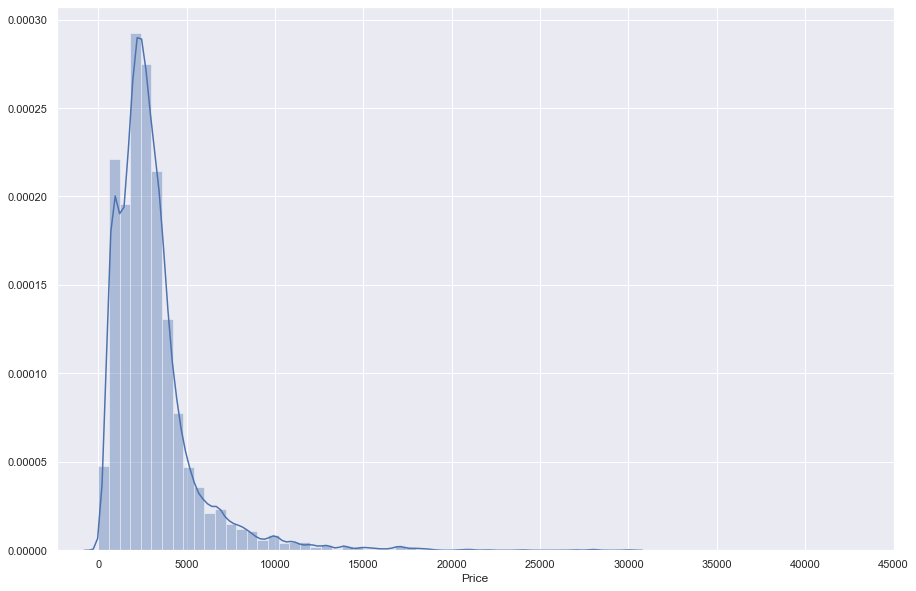

In [15]:
plot = sns.distplot(df['Price'])
plot.set_xticks(np.arange(0, 50000,5000));

Как и предполагалось, ряд имеет ярко выраженную ассиметрию. Эта ситуация весьма типична для рынка недвижимости, так как при большом количестве однородных квартир существует крайне малое количество дорогих квартир.


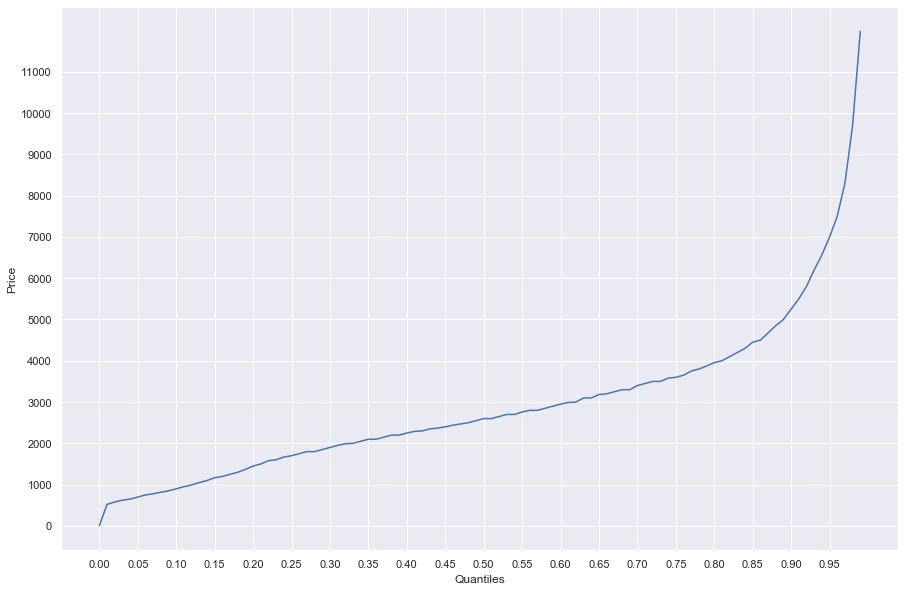

In [138]:
plot = quantile_values_plot(df, 'Price')
plot.set_yticks(np.arange(0, 12000,1000));

Как видно из графика, практически 90% квартир обладают стоимостью менее 5000 т.р.  
В такой ситуации имеет место фильтрация данных, которая будет проводиться в дальнейшем

## Square_Total

In [61]:
count_missing_values(df['Square_Total'])
df['Square_Total'].describe()

Missing values: 0 (0.0 %)


count    6746.000000
mean       49.414056
std        27.324536
min         8.800000
25%        31.000000
50%        45.000000
75%        63.300000
max       352.800000
Name: Square_Total, dtype: float64

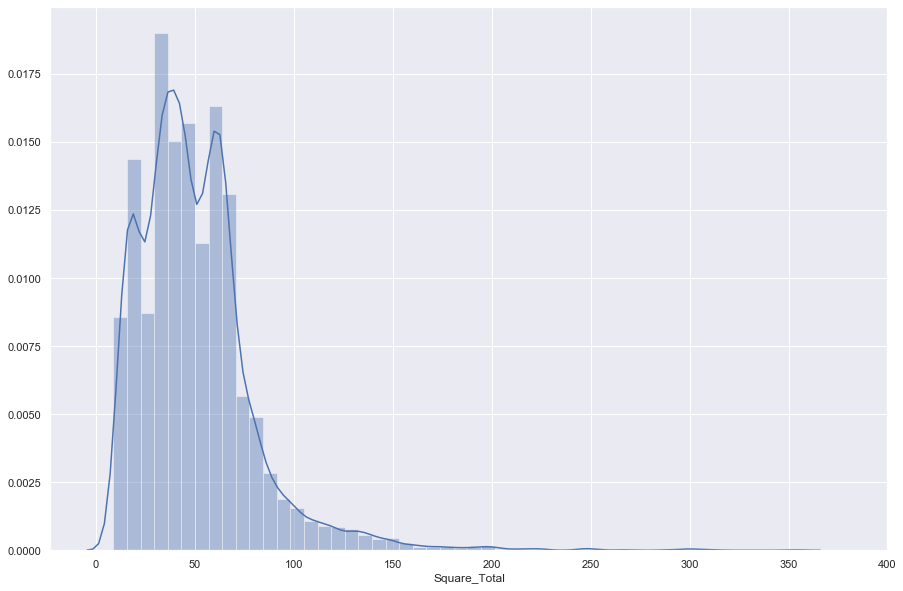

In [16]:
plot = sns.distplot(df['Square_Total'])
plot.set_xticks(np.arange(0, 450,50));

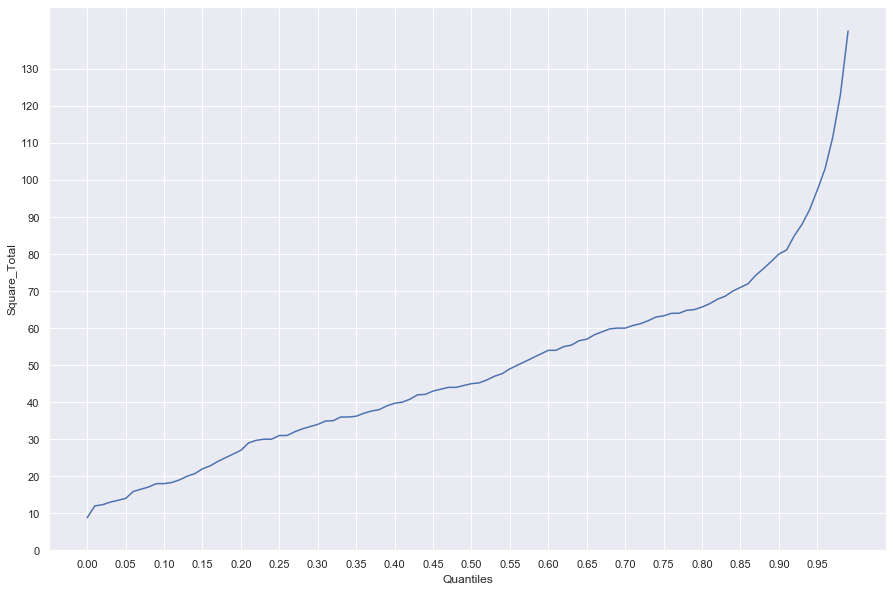

In [139]:
plot = quantile_values_plot(df, 'Square_Total')
plot.set_yticks(np.arange(0, 140,10));

Поведение признака Square_Total подобно признаку Price, так как Square_Total сильнее всего влияет на Price.

## Square_Kitchen (To delete)

In [83]:
count_missing_values(df['Square_Kitchen'])
df['Square_Kitchen'].describe()

Missing values: 4609 (68.0%)


count    2137.000000
mean        9.404619
std         4.008277
min         1.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        44.000000
Name: Square_Kitchen, dtype: float64

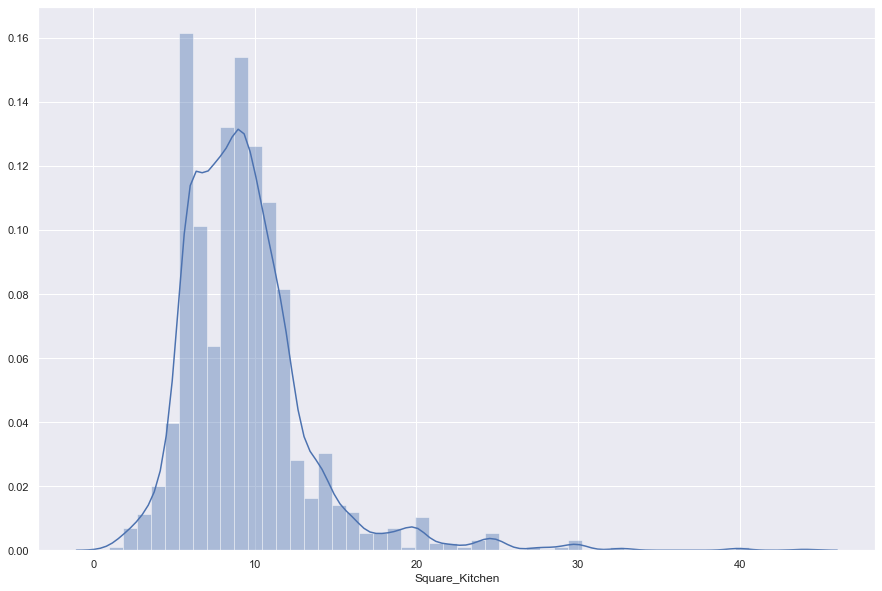

In [119]:
sns.distplot(df['Square_Kitchen']);

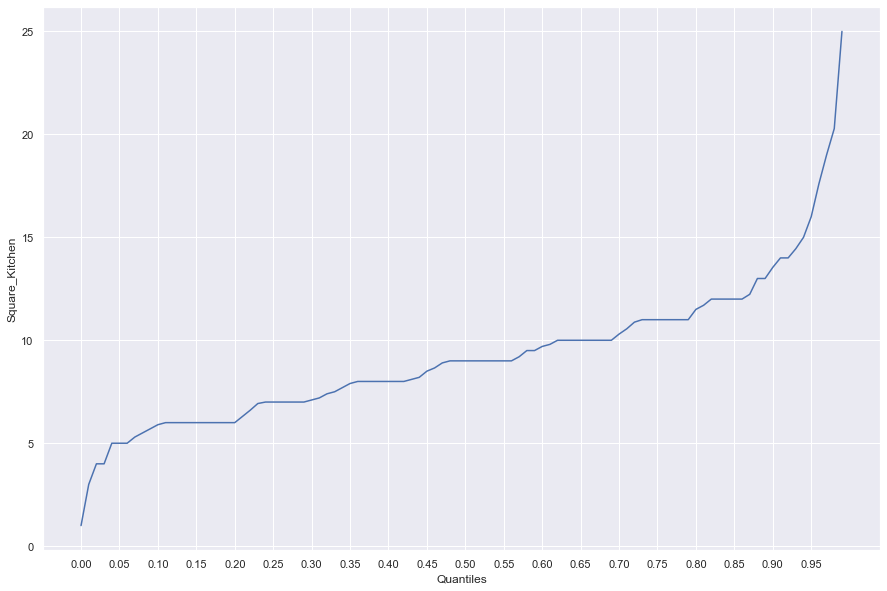

In [126]:
quantile_values_plot(df, 'Square_Kitchen')

## Square_Living (To delete)

In [115]:
count_missing_values(df['Square_Living'])
df['Square_Living'].describe()

Missing values: 4712 (70.0%)


count    2034.000000
mean       34.266323
std        22.619851
min         0.000000
25%        18.000000
50%        30.000000
75%        44.000000
max       450.000000
Name: Square_Living, dtype: float64

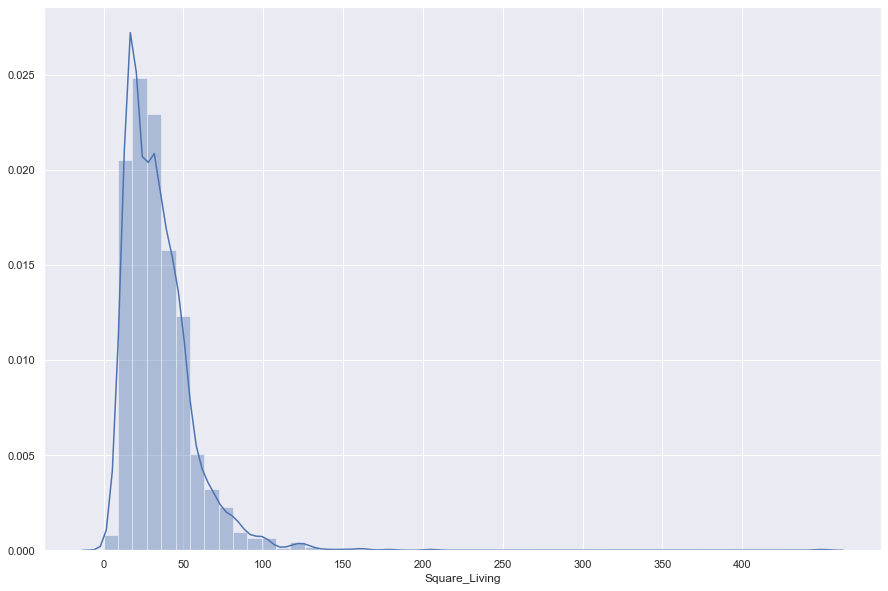

In [113]:
plot = sns.distplot(df['Square_Living'])
plot.set_xticks(np.arange(0, 450,50));

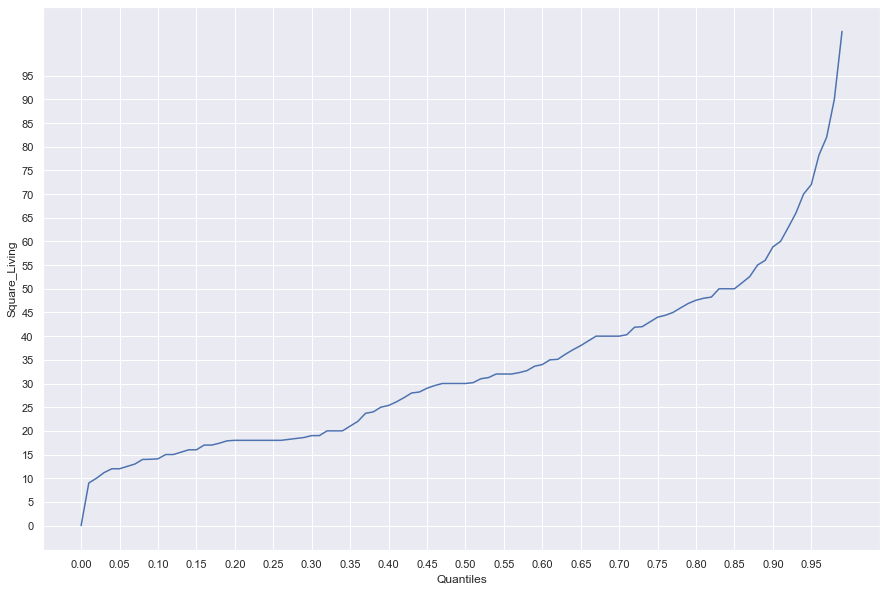

In [140]:
plot = quantile_values_plot(df, 'Square_Living')
plot.set_yticks(np.arange(0, 100,5));

Признаки Square_Kitchen и Square_Living имеют слишком много пропущенных значений, данные признаки следует исключить из анализа.

## Floors_In_Building

In [132]:
count_missing_values(df['Floors_In_Building'])
print(df['Floors_In_Building'].describe())
df['Floors_In_Building'].value_counts()

Missing values: 0 (0.0%)
count    6746.000000
mean        8.097391
std         4.136102
min         1.000000
25%         5.000000
50%         9.000000
75%        10.000000
max        21.000000
Name: Floors_In_Building, dtype: float64


5     1874
10    1246
9     1240
17     371
6      360
2      351
3      273
14     241
4      206
18      90
12      73
7       68
16      67
15      59
11      53
8       51
19      49
1       43
21      19
13      12
Name: Floors_In_Building, dtype: int64

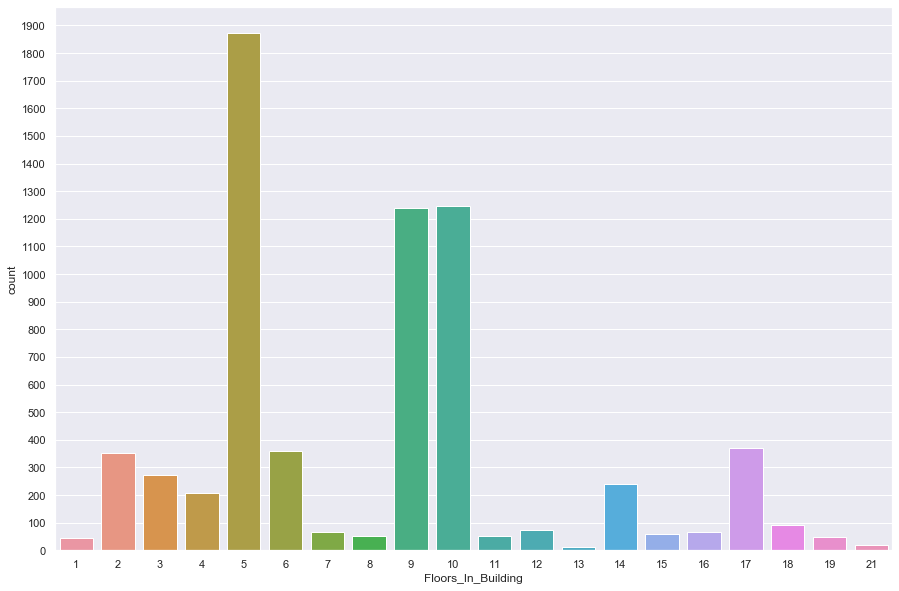

In [145]:
plot = sns.countplot(df['Floors_In_Building'])
plot.set_yticks(np.arange(0, 1901,100));

Как видно из графика, чаще всего встречаются здания с 5, 9 и 10 этажами, что объясняется большим количеством домов 75 и 86 серий, а также так называемыми "хрущевками". 
<br>
Эти типы домов зачастую имеют этажность 5, 9 и 10 этажей.

## Floor

In [133]:
count_missing_values(df['Floor'])
print(df['Floor'].describe())
df['Floor'].value_counts()

Missing values: 0 (0.0%)
count    6746.000000
mean        4.549659
std         3.295118
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        21.000000
Name: Floor, dtype: float64


1     1193
2     1080
5      892
3      889
4      693
6      416
7      334
8      333
9      330
10     252
11      76
12      56
13      52
14      52
16      38
15      33
17      10
19       7
18       4
0        3
21       2
20       1
Name: Floor, dtype: int64

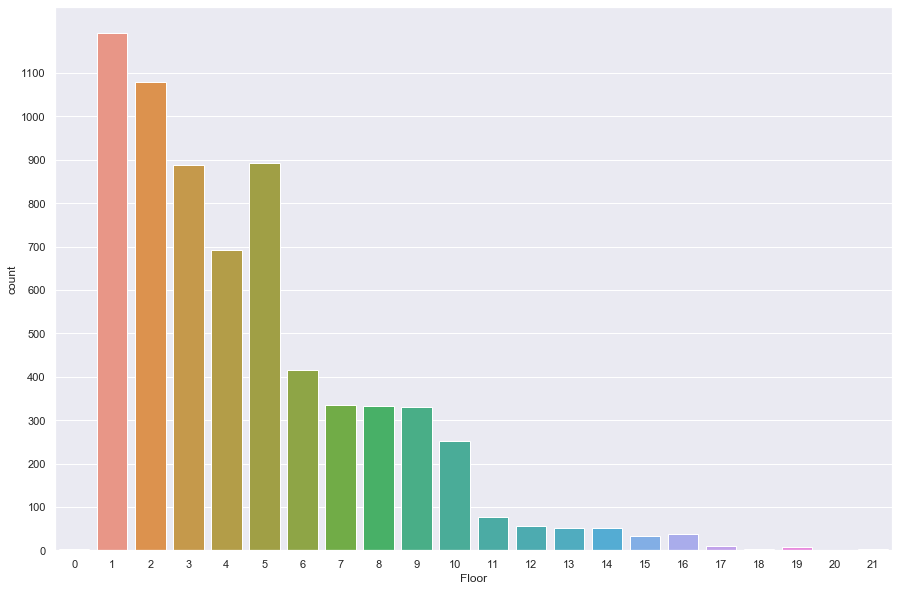

In [146]:
plot = sns.countplot(df['Floor']);
plot.set_yticks(np.arange(0, 1200,100));

По графику видно, что с увеличением этажа расположения квартиры, они реже попадают в объявления о продаже. 
<br>
В дальнейшем предстоит разобраться с природой такого поведения.

## District

In [130]:
count_missing_values(df['District'])
print(df['District'].describe())
df['District'].value_counts()

Missing values: 0 (0.0%)
count                  6746
unique                    4
top       октябрьский район
freq                   2195
Name: District, dtype: object


октябрьский район    2195
ленинский район      1656
советский район      1573
кировский район      1322
Name: District, dtype: int64

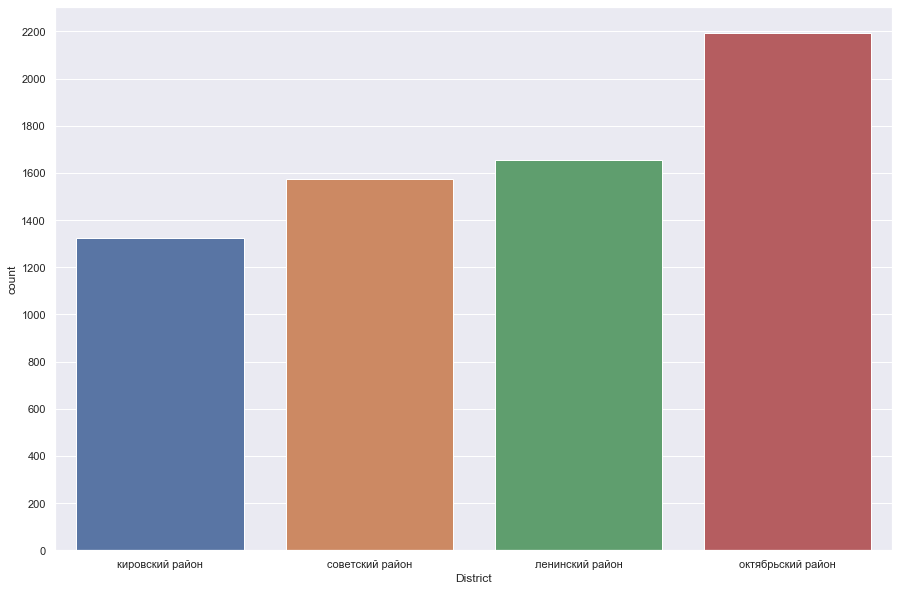

In [154]:
plot = sns.countplot(df['District'])
plot.set_yticks(np.arange(0, 2300,200));

Квартиры чаще всего продаются в Октябрьском районе, реже всего в Кировском районе, у Советского и Ленинского примерное равенство.

## Year_Building

In [134]:
count_missing_values(df['Year_Building'])
df['Year_Building'].describe()

Missing values: 892 (13.0%)


count    5854.000000
mean     1989.927571
std        22.142277
min      1832.000000
25%      1974.000000
50%      1990.000000
75%      2010.000000
max      2020.000000
Name: Year_Building, dtype: float64

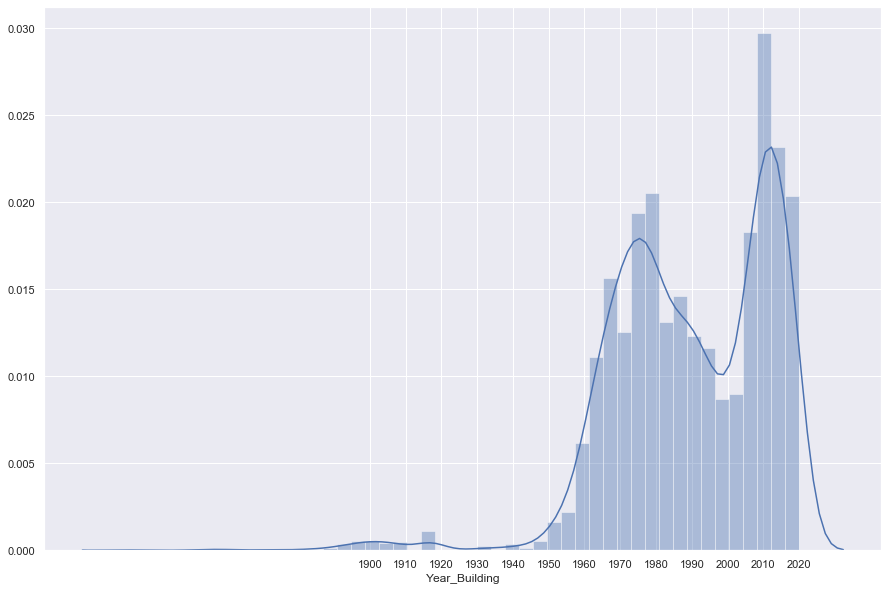

In [28]:
plot = sns.distplot(df['Year_Building'])
plot.set_xticks(np.arange(1900, 2021,10));

На графике видно, что основная часть зданий была построена начиная от 1950 года. Возможно, здания построенные до 1950 года стоит удалить из выборки.

## Material (Filtered)

In [155]:
count_missing_values(df['Material'])
print(df['Material'].describe())
df['Material'].value_counts()

Missing values: 72 (1.0%)
count       6674
unique         6
top       кирпич
freq        4099
Name: Material, dtype: object


кирпич          4099
панель          2001
дерево           258
монолит          223
шлакоблок         91
стеноблочный       2
Name: Material, dtype: int64

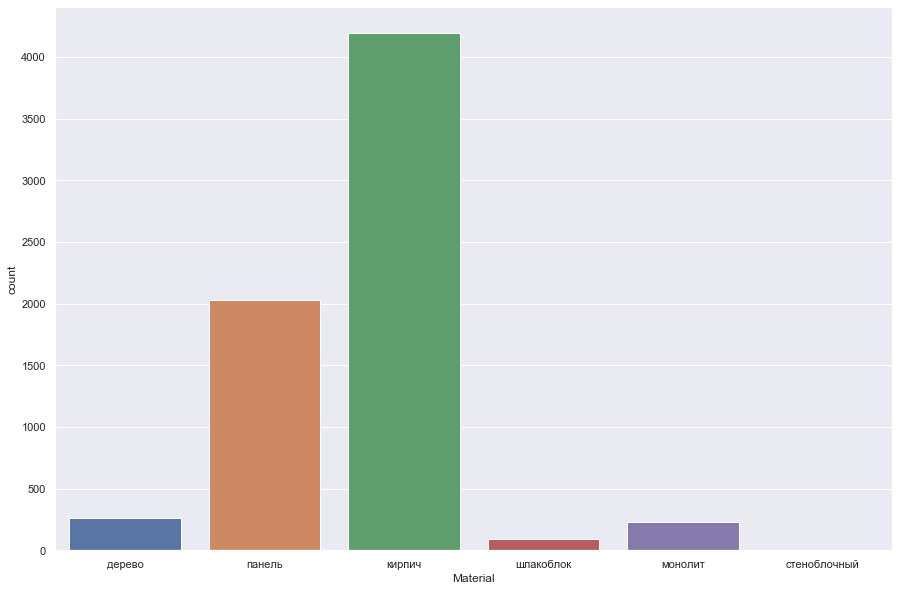

In [209]:
sns.countplot(df['Material']);

По материалу зданий лидирует кирпич и панель, остальные материалы встречаются крайне редко. Возможно их стоит удалить из выборки.

## Apartment_Type (To delete)

In [156]:
count_missing_values(df['Apartment_Type'])
print(df['Apartment_Type'].describe())
df['Apartment_Type'].value_counts()

Missing values: 5339 (79.0%)
count         1407
unique           6
top       гостинка
freq           670
Name: Apartment_Type, dtype: object


гостинка          670
секционка         322
малогабаритная    288
комната            99
двухуровневая      25
апартаменты         3
Name: Apartment_Type, dtype: int64

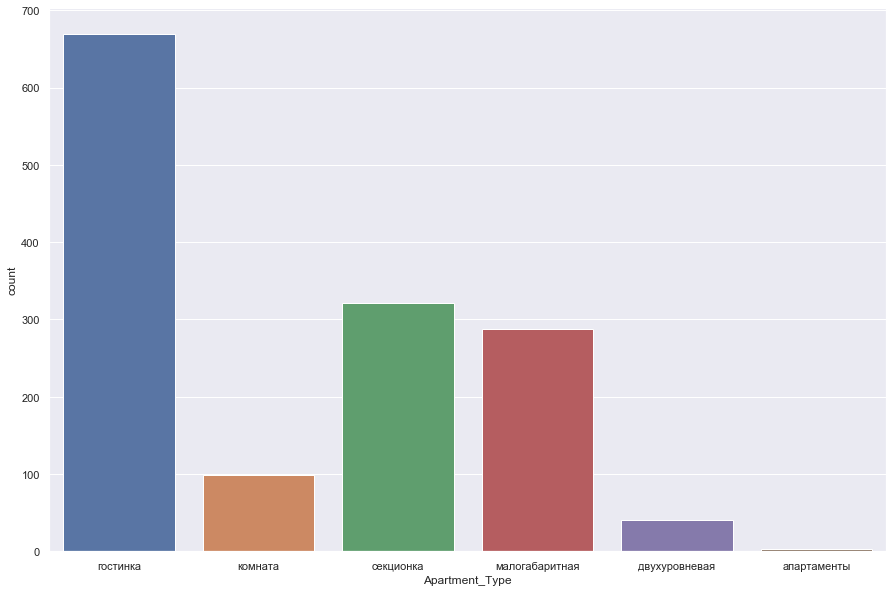

In [32]:
sns.countplot(df['Apartment_Type']);

Признак Apartment_Type имеет слишком много пропущенных значений, данный признак не будет принимать участия в дальнейшем анализе.

## Rooms_Number (Filtered)

In [157]:
count_missing_values(df['Rooms_Number'])
print(df['Rooms_Number'].describe())
df['Rooms_Number'].value_counts()

Missing values: 0 (0.0%)
count    6746.000000
mean        1.905722
std         0.923303
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Rooms_Number, dtype: float64


1    2857
2    2034
3    1489
4     366
Name: Rooms_Number, dtype: int64

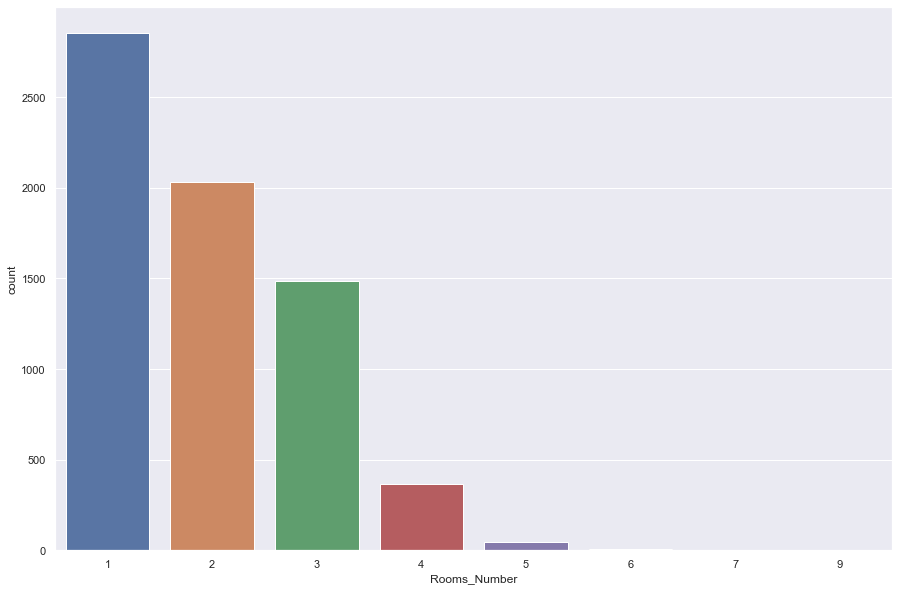

In [34]:
sns.countplot(df['Rooms_Number']);

Основная доля квартир приходится на квартиры с 1-4 комнатами, все остальные квартиры стоит удалить из выборки.

## Apartment_Condition

In [158]:
count_missing_values(df['Apartment_Condition'])
print(df['Apartment_Condition'].describe())
df['Apartment_Condition'].value_counts()

Missing values: 1116 (17.0%)
count                    5630
unique                      4
top       в хорошем состоянии
freq                     3098
Name: Apartment_Condition, dtype: object


в хорошем состоянии     3098
в отличном состоянии    1786
требуется ремонт         491
черновая отделка         255
Name: Apartment_Condition, dtype: int64

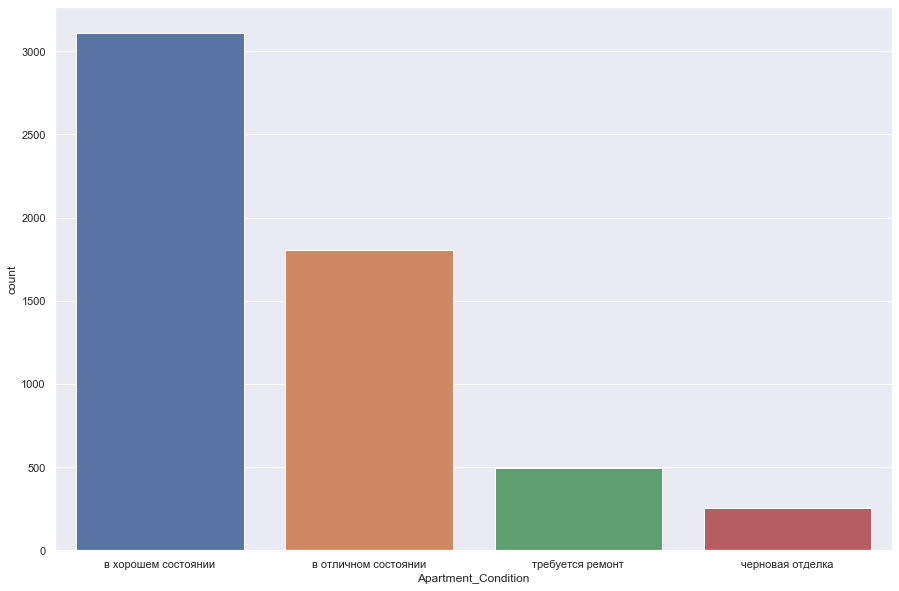

In [37]:
sns.countplot(df['Apartment_Condition']);

Большая часть квартир продается в хорошем состоянии, следом идут квартиры в отличном состоянии.  
В дальнейшем анализе предстоит узнать, как указанное состояние связано с ценой квартиры.

## Bathroom_Type

In [159]:
count_missing_values(df['Bathroom_Type'])
print(df['Bathroom_Type'].describe())
df['Bathroom_Type'].value_counts()

Missing values: 818 (12.0%)
count            5928
unique              2
top       совмещенный
freq             3040
Name: Bathroom_Type, dtype: object


совмещенный    3040
раздельный     2888
Name: Bathroom_Type, dtype: int64

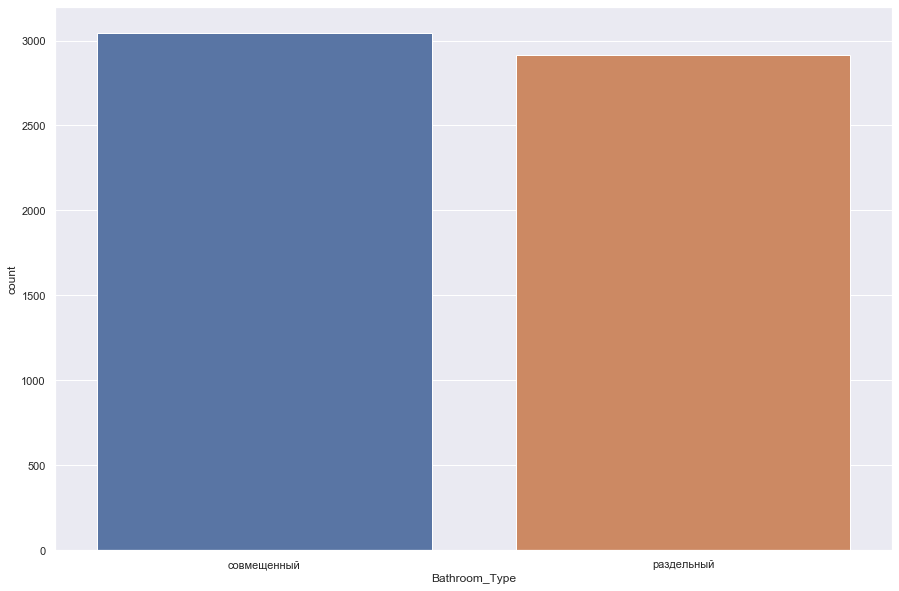

In [38]:
sns.countplot(df['Bathroom_Type']);

Что касается типа санузла, то чаще всего встречается совмещенный санузел, хотя разница не настолько критична.

## Balcony_Loggia

In [161]:
count_missing_values(df['Balcony_Loggia'])
print(df['Balcony_Loggia'].describe())
df['Balcony_Loggia'].value_counts()

Missing values: 2520 (37.0%)
count                   4226
unique                    10
top       лоджия, остекление
freq                    1600
Name: Balcony_Loggia, dtype: object


лоджия, остекление             1600
балкон, остекление             1186
балкон                          734
2 лоджии, остекление            229
лоджия                          199
балкон и лоджия, остекление     129
2 балкона, остекление            80
2 балкона                        26
2 лоджии                         24
балкон и лоджия                  19
Name: Balcony_Loggia, dtype: int64

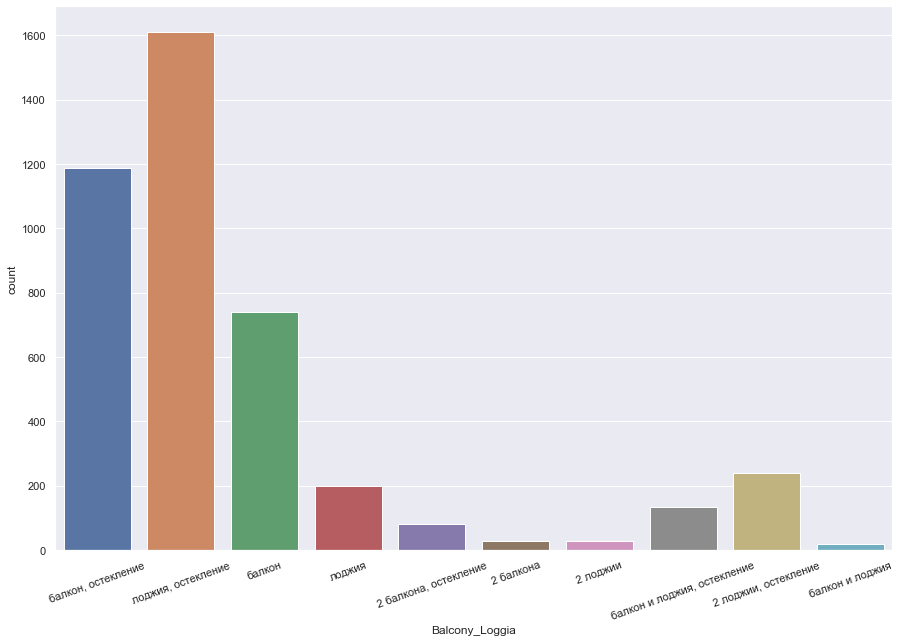

In [42]:
plot = sns.countplot(df['Balcony_Loggia'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=20);

## Address, Date_Add, Date_Expiration
Данные признаки не получится проанализировать в том виде, в котором они имеются сейчас, но они будут использованы при попытке создания новых признаков (Feature Engeneering).

# Анализ признаков с взаимодействиями, фильтрация данных
В данном разделе будет проведен широкий и детальный анализ данных в разрезе различных признаков и их взаимодействиях.  
Будет проведена обработка данных, фильтрация, заполнение пропусков и т.д.

Стоит помнить, что ранее было решено провести следующую фильтрацию и удалить:  
    <li>Столбцы Square_Kitchen, Square_Living, Apartment_Type.
    <li>Строки, в которых материал не кирпич и не панель.
    <li>Строки, в которых количество комнат более 4.

In [130]:
df = df[df['Rooms_Number'] <= 4]
df = df[[i in {'кирпич', 'панель'} for i in df['Material']]]
df = df.drop(['Square_Kitchen', 'Square_Living', 'Apartment_Type'], axis=1)

In [131]:
df.columns.tolist()

['District',
 'Address',
 'Sales_Type',
 'Year_Building',
 'Material',
 'Floors_In_Building',
 'Floor',
 'Price',
 'Square_Total',
 'Rooms_Number',
 'Apartment_Condition',
 'Bathroom_Type',
 'Balcony_Loggia',
 'Date_Add',
 'Date_Expiration',
 'Not_Used',
 'Not_Used_Description']

На рынке недвижимости ключевым ценообразующим признаком для квартиры считается общая площадь.  
В то же время, отделять одни квартиры от других проще всего используя количество комнат.  
Необходимо выяснить, отличается ли поведение стоимости, например, 1-комнатных квартир от остальных, и так проделать с каждым видом квартир

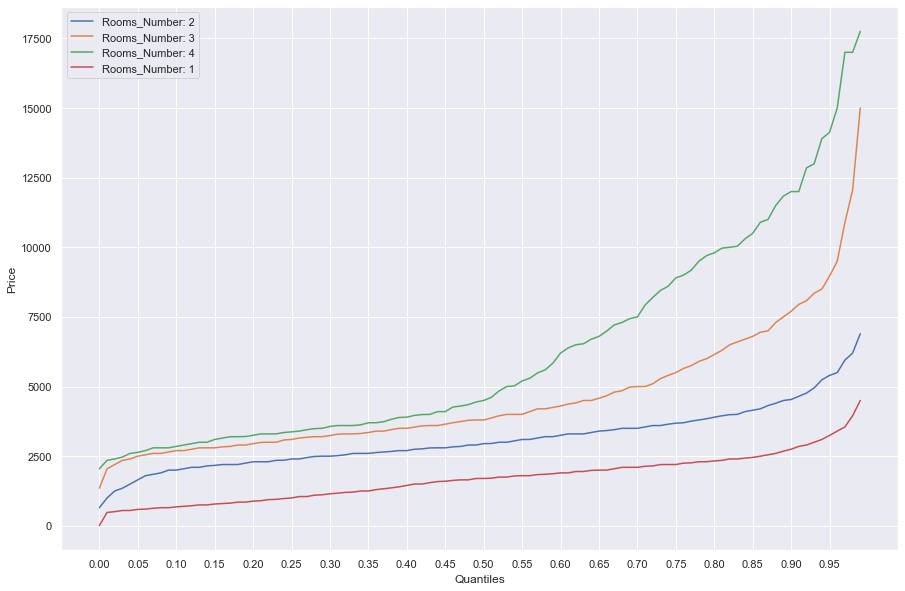

In [132]:
quantile_values_plot(df, 'Price', 'Rooms_Number')

На этом графике отражена зависимость квантилей и соответствующих им стоимостей квартиры в зависимости от количества комнат.  
Из графика следует:
<li>1 и 2-комнатные квартиры в практически 95% случаев имеют равномерное распределение стоимости, за исключением оставшихся 5%
<li>3-комнатные квартиры имеют равномерное распределение примерно в 60% случаев, далее идет сильное увеличение стоимости квартир.
<li>4-комнатные квартиры имеют равномерное распределение примерно в 45% случаев, далее начинается явная ассиметрия в стоимости квартир.

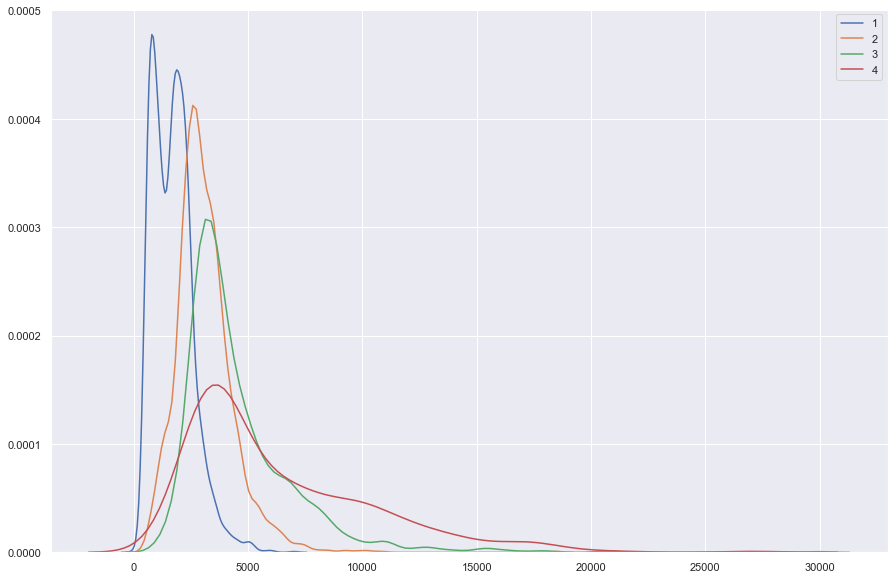

In [27]:
for i in sorted(df['Rooms_Number'].unique().tolist()):
    sns.kdeplot(df.loc[df['Rooms_Number'] == i, 'Price'], label=i)
plt.legend();

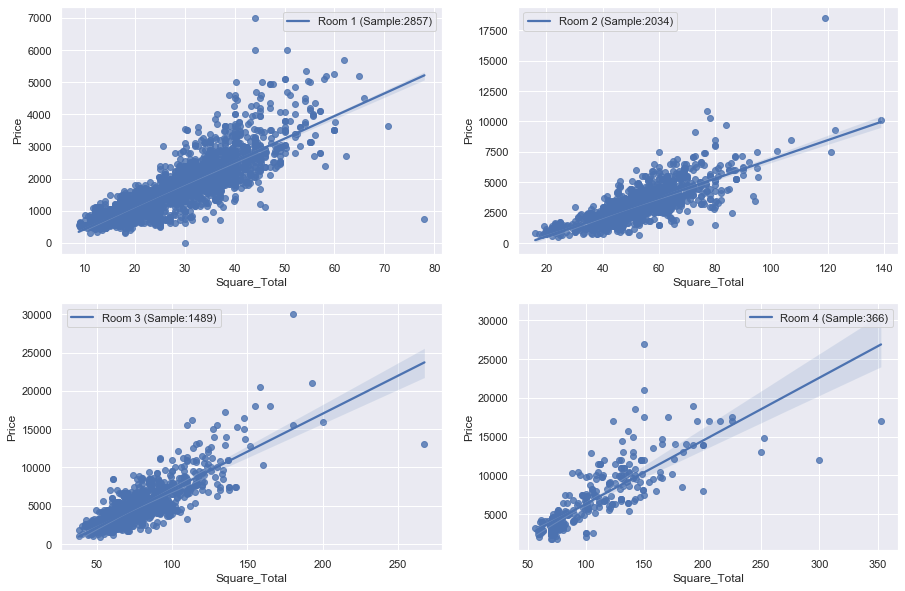

In [7]:
rooms_count = df['Rooms_Number'].value_counts().tolist()

f, axes = plt.subplots(2, 2)

sns.regplot(x='Square_Total', y='Price', data=df[df['Rooms_Number'] == 1], ax=axes[0, 0])
sns.regplot(x='Square_Total', y='Price', data=df[df['Rooms_Number'] == 2], ax=axes[0, 1])
sns.regplot(x='Square_Total', y='Price', data=df[df['Rooms_Number'] == 3], ax=axes[1, 0])
sns.regplot(x='Square_Total', y='Price', data=df[df['Rooms_Number'] == 4], ax=axes[1, 1])
axes[0, 0].legend(["Room 1 (Sample:{0})".format(rooms_count[0])])
axes[0, 1].legend(["Room 2 (Sample:{0})".format(rooms_count[1])])
axes[1, 0].legend(["Room 3 (Sample:{0})".format(rooms_count[2])])
axes[1, 1].legend(["Room 4 (Sample:{0})".format(rooms_count[3])]);

На всех графиках видно, что природа стоимости квартиры сильно меняется в зависимости от количества квартир.  
Дальнейший анализ будет проводится отдельно для каждого вида квартир.

## 1-комнатные квартиры

In [133]:
df_room_1 = df[df['Rooms_Number'] == 1]
df_room_1.head(5)

,District,Address,Sales_Type,Year_Building,Material,Floors_In_Building,Floor,Price,Square_Total,Rooms_Number,Apartment_Condition,Bathroom_Type,Balcony_Loggia,Date_Add,Date_Expiration,Not_Used,Not_Used_Description
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4424510,октябрьский район,"Томск, Архитекторов 9",вторичное,2014.0,панель,10,9,1950.0,32.0,1,в хорошем состоянии,совмещенный,"балкон, остекление",2020-05-01 13:07:30,2020-07-30,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4415310,советский район,"Томск, Тверская 68",вторичное,1973.0,кирпич,5,3,1100.0,13.0,1,в хорошем состоянии,раздельный,NaN,2020-05-01 13:02:32,2020-07-30,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4424988,кировский район,"Томск, Кулева 32",вторичное,1951.0,кирпич,4,4,960.0,16.0,1,NaN,NaN,NaN,2020-05-01 13:06:18,2020-06-15,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4417466,кировский район,"Томск, Белинского 21а/1",вторичное,1956.0,кирпич,3,1,1000.0,24.0,1,NaN,совмещенный,NaN,2020-05-01 13:03:04,2020-07-30,0,None
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4415128,кировский район,"Томск, Усова 21/3 (Красноармейская 120/1)",вторичное,1979.0,кирпич,9,6,900.0,17.0,1,NaN,NaN,NaN,2020-05-01 13:02:41,2020-07-30,0,None


### Price & Square_Total

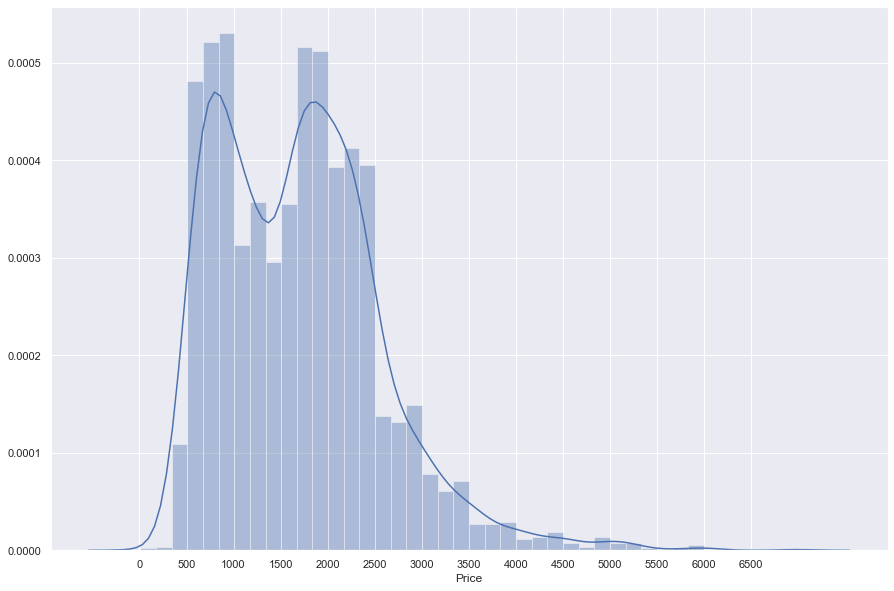

In [60]:
plot = sns.distplot(df_room_1['Price'])
plot.set_xticks(np.arange(0, 7000,500));

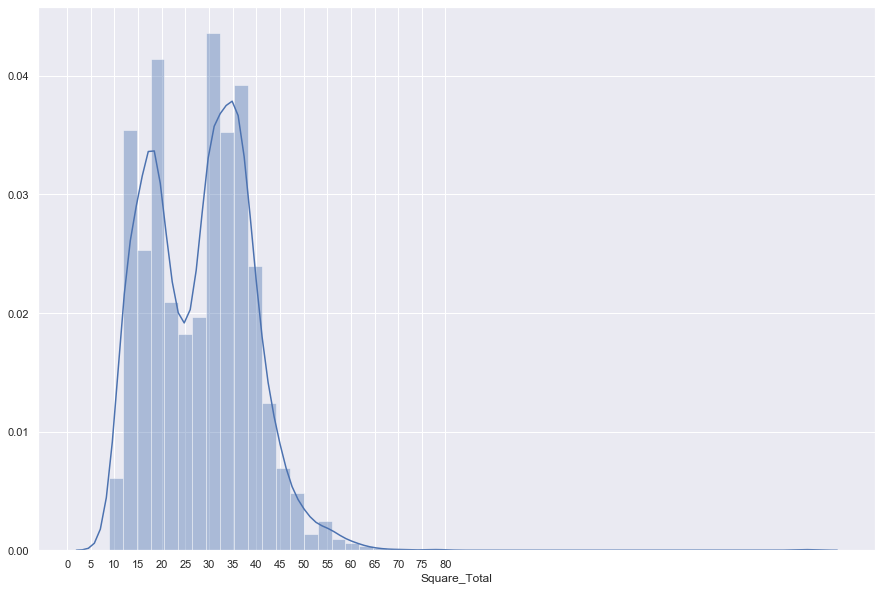

In [61]:
plot = sns.distplot(df_room_1['Square_Total'])
plot.set_xticks(np.arange(0, 81,5));

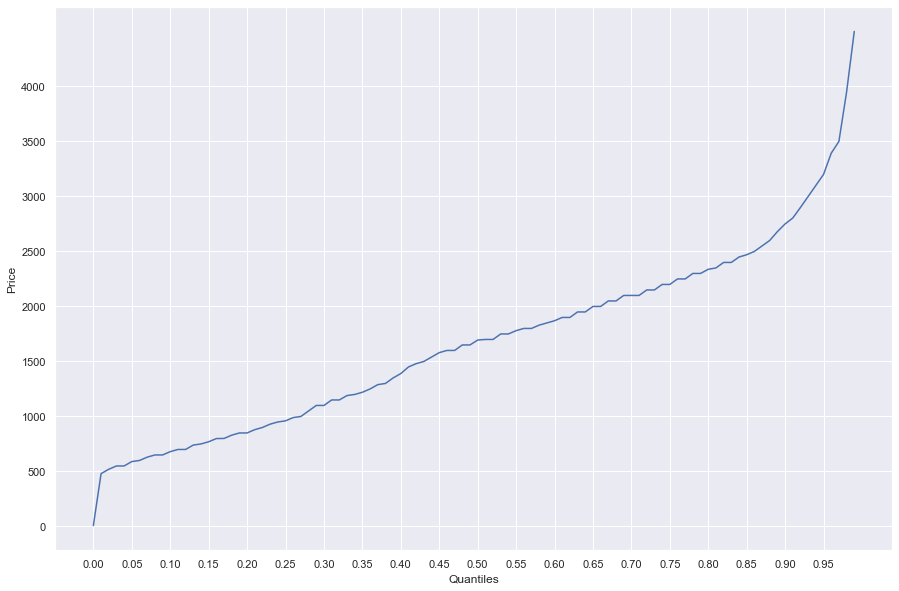

In [65]:
plot = quantile_values_plot(df_room_1, 'Price')
plot.set_yticks(np.arange(0, 4001, 500));

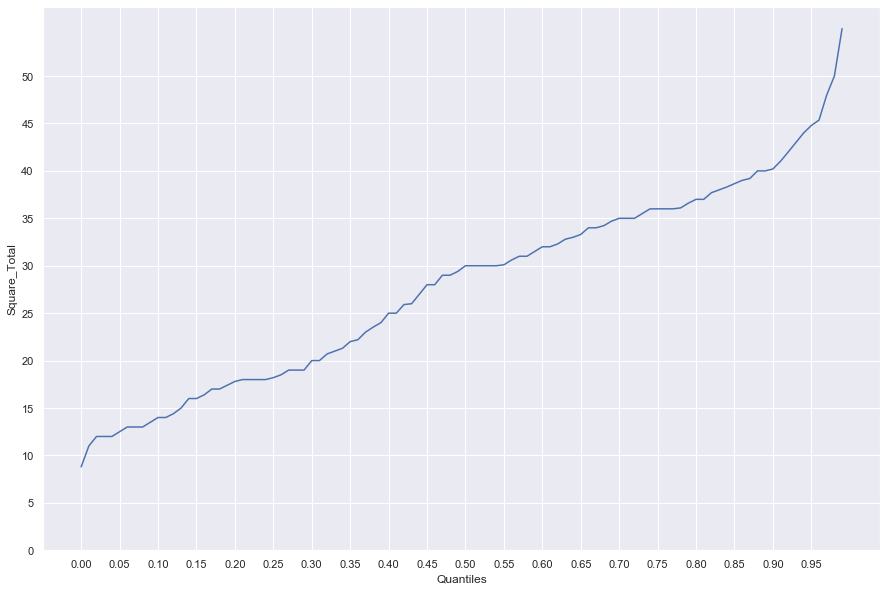

In [66]:
plot = quantile_values_plot(df_room_1, 'Square_Total')
plot.set_yticks(np.arange(0,51, 5));

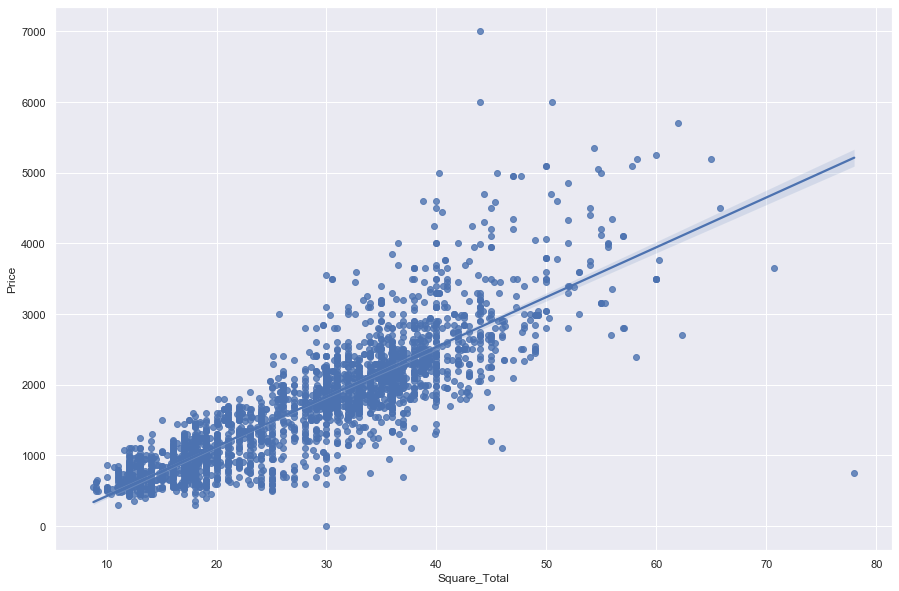

In [170]:
sns.regplot(x='Square_Total', y='Price', data=df_room_1);

На основе построенных графиках принято решение исключить из анализа 1-комнатные квартиры стоимостью ниже 500 т.р. и выше 3000 т.р., а также площадью ниже 12 кв. м и выше 50 кв. м

In [134]:
df_room_1.loc[df_room_1['Price'] < 500, ['Not_Used', 'Not_Used_Description']] = [1, 'Price lower than bound']
df_room_1.loc[df_room_1['Price'] > 3000, ['Not_Used', 'Not_Used_Description']] = [1, 'Price higher than bound']
df_room_1.loc[df_room_1['Square_Total'] < 12, ['Not_Used', 'Not_Used_Description']] = [1, 'Square_Total lower than bound']
df_room_1.loc[df_room_1['Square_Total'] > 50, ['Not_Used', 'Not_Used_Description']] = [1, 'Square_Total higher than bound']

C:\Users\qwerty.Oleg\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [83]:
def clean(df: pd.DataFrame):
    return df[df['Not_Used'] == 0]

In [106]:
df_room_1.shape[0] - clean(df_room_1).shape[0]

313

In [84]:
clean(df_room_1).shape

(2831, 22)

В результате фильтрации из 3144 экземпляров были отброшены 313 элементов (значение может меняться, т.к. зависит от поступающих данных)

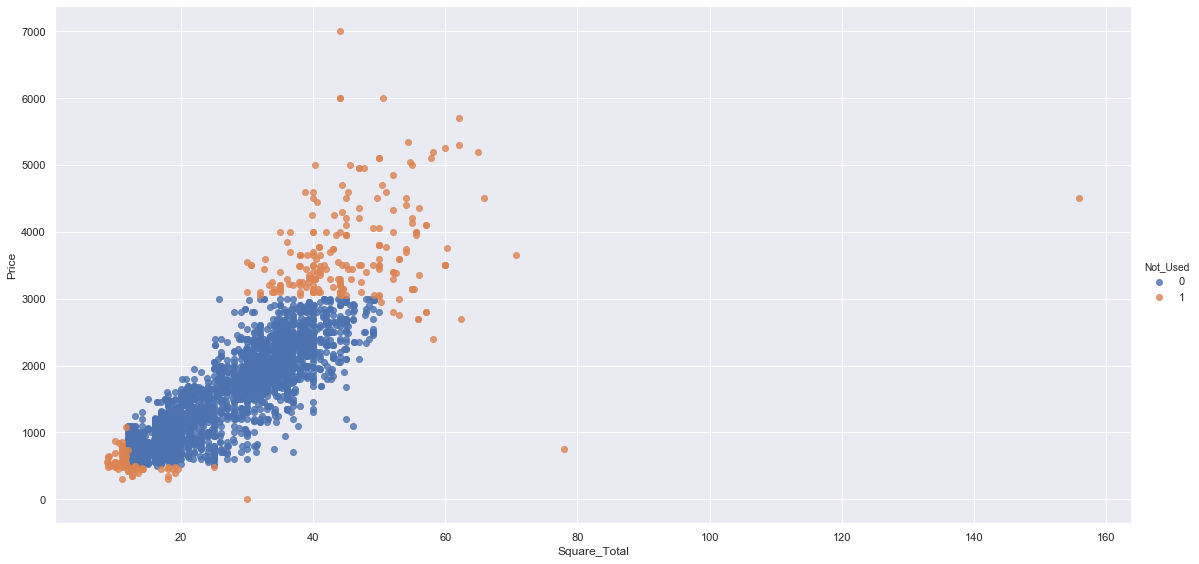

In [108]:
sns.lmplot(x='Square_Total', y='Price', hue='Not_Used', data=df_room_1, fit_reg=False, height=8, aspect=2);

На графике синими точками обозначены экземпляры квартир, которые остаются в выборке и будут использоваться в дальнейшей аналитике.